In [18]:
# conda activate py38
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
#import argparse
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths

In [19]:
cv2.__version__

'4.5.1'

In [20]:
# Super Resolution
path = "ESPCN/ESPCN_x4.pb"
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(path)
sr.setModel("espcn",4)

In [25]:
amount_of_person = 5
training_path = "training/"
tes_path = "test/"
data = []
labels = []
imgs = []
class_img = []
for i,imagePath in enumerate(paths.list_images(training_path)):
    make = imagePath.split("/")[-2]
    image = cv2.imread(imagePath)
    image = sr.upsample(image) # Super Resolution
    image= cv2.pyrUp(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resize_img = cv2.resize(gray , (500, 500))
    imgs.append(resize_img)
    if((i+1)%5 == 0):
        class_img.append(imgs)
        imgs= []
    (H, hogImage) = feature.hog(resize_img, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, visualize=True)
    data.append(H)
    labels.append(make)     

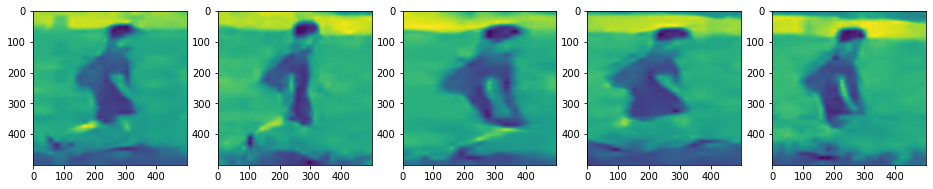

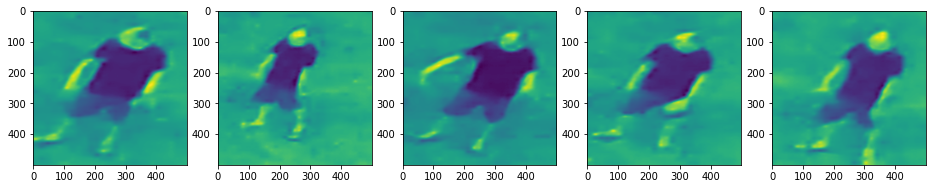

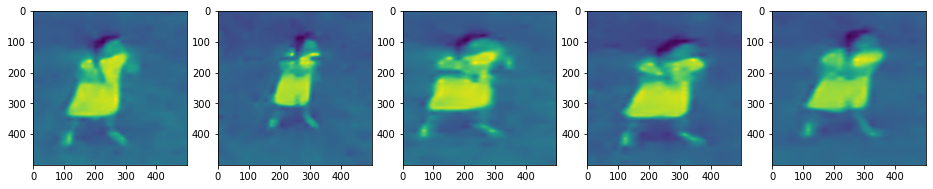

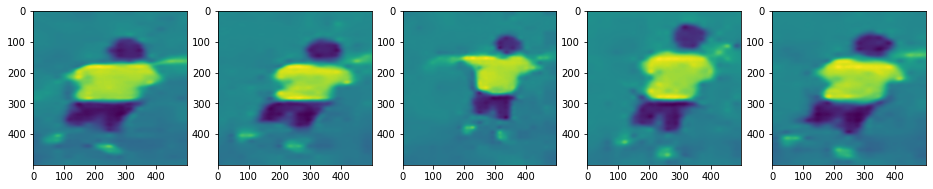

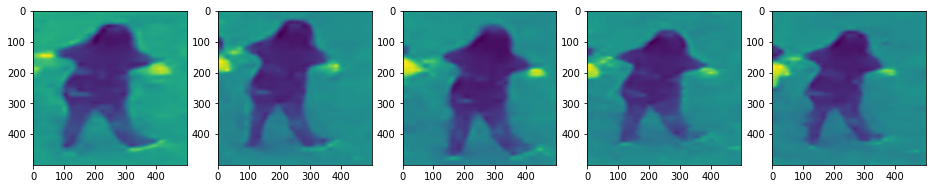

In [26]:
# plt all images
for i in range(amount_of_person):
    figure, ax = plt.subplots(1, amount_of_person, figsize=(16, 8))
    for j in range(amount_of_person):
        ax[j].imshow(class_img[i][j])  

In [27]:
model = KNeighborsClassifier(n_neighbors=1)

In [28]:
model.fit(data, labels)

KNeighborsClassifier(n_neighbors=1)

In [29]:
result = []
hogimgs = []
for (i, imagePath) in enumerate(paths.list_images(tes_path)):
    image = cv2.imread(imagePath)
    image = sr.upsample(image)
    image= cv2.pyrUp(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resize_img = cv2.resize(gray , (500, 500))
    (H, hogImage) = feature.hog(resize_img, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, visualize=True)
    hogimgs.append(hogImage)
    print(max(H))
    pred = model.predict(H.reshape(1, -1))[0]
    print(pred)
    cv2.putText(image, pred.title(), (2, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 0)
    result.append(image)

0.9999999987499999
id_005
0.9999999987499999
id_001
0.7071067807446058
id_004
0.6846658571594535
id_003
0.9999999987499999
id_003
0.9999999987499999
id_003
0.7191950078836497
id_002


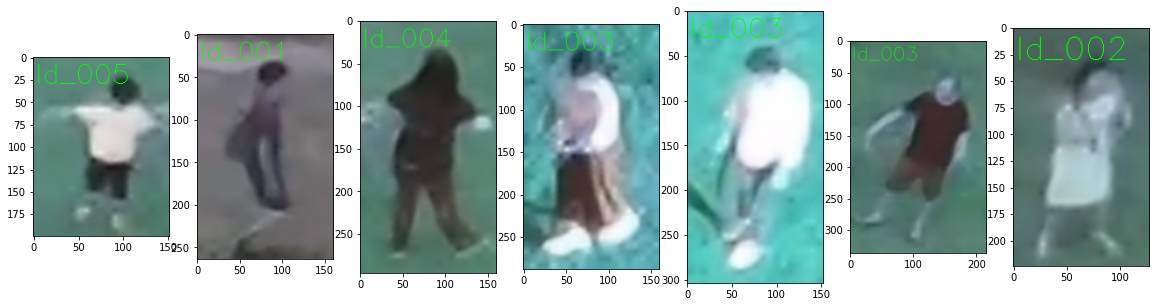

In [30]:
# plt all predit images
figure, ax = plt.subplots(1, len(result), figsize=(20, 60))
for i in range(len(result)):
    ax[i].imshow(result[i])  

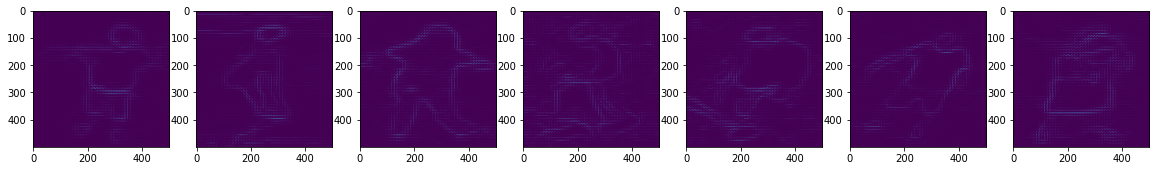

In [17]:
# plt all predit images
figure, ax = plt.subplots(1, len(hogimgs), figsize=(20, 60))
for i in range(len(hogimgs)):
    ax[i].imshow(hogimgs[i])  